In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(autoload_with= engine)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = base.classes.measurement
Station = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date_str = session.query(func.max(Measurement.date)).first()[0]
most_recent_date_str

'2017-08-23'

Breaking down the query to retrive past 12 months of data

<class 'datetime.date'>


<AxesSubplot:xlabel='Date', ylabel='Inches'>

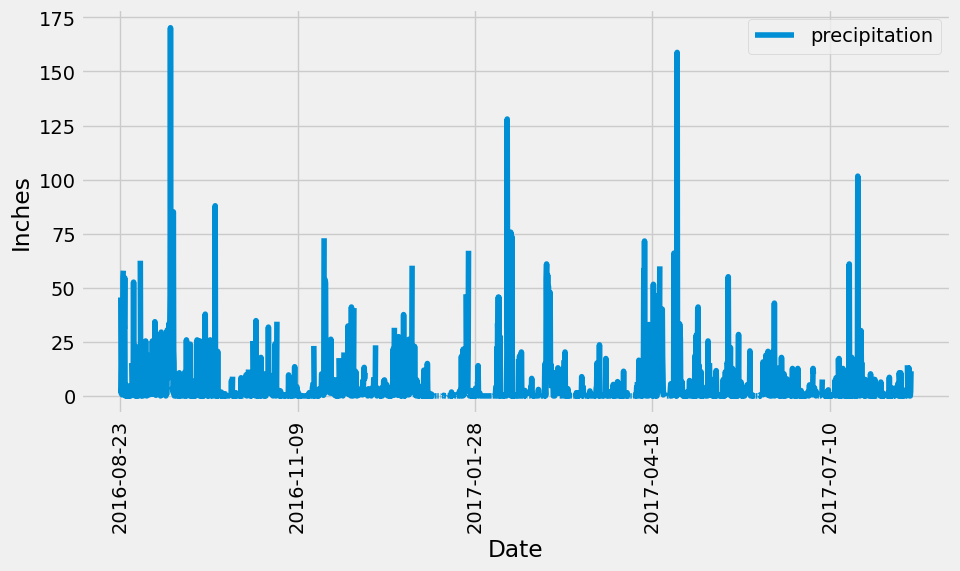

In [10]:
# Jump to here
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
#converting ISO Date String into Date object
first_date = dt.date.fromisoformat(most_recent_date_str) -dt.timedelta(days=365) 
print(type(first_date))

# Perform a query to retrieve the data and precipitation scores
precipitation_scores = session.query(Measurement.date, Measurement.prcp).filter(first_date <= Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_scores_df = pd.DataFrame(precipitation_scores, columns=['date', 'precipitation'])
precipitation_scores_df.set_index('date', inplace = True)

# Sort the dataframe by date
precipitation_scores_df = precipitation_scores_df.sort_values(by = 'date')

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_scores_df.plot(rot = 90, xlabel = 'Date', ylabel='Inches', figsize=(10,5))

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_scores_df.describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
stations_number = session.query(func.count(Station.station)).first()[0]
stations_number

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_count= session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temperature = session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first
max_temperature = session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first
avg_Temperature = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').first

#How do I get this to print? 

Text(0.5, 0, 'Temperature')

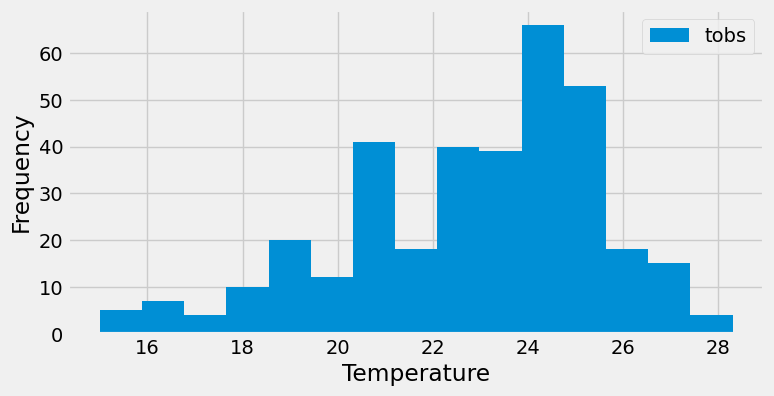

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >=first_date).all()
station_df = pd.DataFrame(data, columns=["tobs"])
station_df.plot.hist(bins= 15, figsize = (8,4))
plt.xlabel('Temperature')

# Close Session

In [16]:
# Close Session
session.close()